domingo 16 de mayo de 2019  
  
_Benjamín Hernández Cortés_ - _Juan Pablo Rojas Rojas_  
_Departamento de Ingeniería Informática (DIINF)_  
_Universidad de Santiago de Chile (USACH)_


## Laboratorio 3 - Fundamentos de Aprendizaje Profundo con Redes Neuronales
___

El presente código está orientado hacia la implementación de una red neuronal convolucional o CNN (Convolutional Neural Network), la cual será diseñada y empleada con el fin de clasificar un conjunto de 25.000 imagenes de perros y gatos, que pueden ser descargados a través del siguiente enlace: [Kaggle Cats and Dogs Dataset](https://www.microsoft.com/en-us/download/confirmation.aspx?id=54765).


#### Importación de bibliotecas
---

Las bibliotecas a emplear son:
- **os:** Manejo de funcionalidades dependientes del sistema operativo
- **numpy:** Herramienta de computación científica, que permite trabajar a través de vectores
- **matplotlib:** Visualización gráfica de diversos datos de interés
- **tensorflow:** Diseño e implementación de la red neuronal convolucional
- **cv2:** Manejo del conjunto de imagenes
- **random:** Uso de funciones relacionadas con la aleatoriedad
- **tqdm:** Barra de progreso interactiva

### ¡PRECAUCIONES!
---

Para asegurar el correcto funcionamiento de la herramienta, es necesario tener en cuenta las siguientes precauciones y las acciones a tomar, para el reparar algunas funcionalidades que podrían presentar problemas.

| <p style='text-align: left;'>**Error**</p>  | <p style='text-align: left;'>**Descripción**</p> |
| ------------ | ------------ |
| <p style='text-align: justify;'>`UnboundLocalError: local variable 'photoshop' referenced before assignment`</p> |  <p style='text-align: justify;'>Este mensaje de error se presenta al momento de utilizar la clase _ImageDataGenerator_ de _tensorflow.keras.preprocessing.image_. Este error puede ser reparado haciendo una leve modificación al archivo _JpegImagePlugin.py_ asociado a la biblioteca _PIL_, siguiendo los pasos indicados en este [post](https://github.com/python-pillow/Pillow/pull/3771#issuecomment-485104596).</p>|
| <p style='text-align: justify;'>`Problema al obtener/cargar las imagenes`</p> |  <p style='text-align: justify;'>El conjunto de imagenes indicado al principio de este trabajo ([Kaggle Cats and Dogs Dataset](https://www.microsoft.com/en-us/download/confirmation.aspx?id=54765)), posee un par de imagenes que no contienen información y por lo tanto, no pueden ser empleadas. Las imagenes en cuestión son _/PetImages/Cat/666.jpg_ y _/PetImages/Dog/11702.jpg_. Se recomienda que elimine las imagenes anteriormente indicadas, previo a la ejecución de este archivo.</p>|

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import tensorflow as tf
import cv2
import warnings

from random import shuffle
from tqdm import tqdm
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Activation, BatchNormalization
from sklearn.metrics import classification_report, confusion_matrix

warnings.filterwarnings('ignore')

### 1. Lectura y procesamiento del conjunto de imagenes Kaggle

In [2]:
IMAGE_SIZE = 64
IMAGE_WIDTH, IMAGE_HEIGHT = IMAGE_SIZE, IMAGE_SIZE
input_shape = (IMAGE_WIDTH, IMAGE_HEIGHT, 1)

# Cambiar a True si se desea cargar el modelo indicado más abajo
LOAD = False

datagen = ImageDataGenerator(rescale=1.0/255.0,
                             validation_split=0.3)

# Conjunto de prueba
training_dataset = datagen.flow_from_directory('PetImages/',
                                               target_size=(IMAGE_SIZE, IMAGE_SIZE),
                                               batch_size=100,
                                               color_mode='grayscale',
                                               class_mode='categorical',
                                               shuffle=True,
                                               subset='training')

# Conjunto de validación
validation_dataset = datagen.flow_from_directory('PetImages/',
                                                 target_size=(IMAGE_SIZE, IMAGE_SIZE),
                                                 batch_size=100,
                                                 color_mode='grayscale',
                                                 class_mode='categorical',
                                                 shuffle=True,
                                                 subset='validation')


#Contrucción del modelo de capas
model = Sequential()

model.add(Conv2D(32, (5, 5), activation='relu', input_shape=(60,60,1)))

model.add(MaxPooling2D(pool_size=(3, 3)))

model.add(Conv2D(64, (5, 5), activation='relu', input_shape=(60,60,1)))

model.add(MaxPooling2D(pool_size=(3, 3)))

model.add(Flatten())

#Construcción del perceptron
model.add(Dense(256, activation='relu'))

model.add(Dense(2, activation='softmax'))



model.compile(loss="categorical_crossentropy",
              optimizer="adam",
              metrics=["accuracy"])

# Detalle del modelo
model.summary()

# Entrenamiento del modelo
history = model.fit_generator(training_dataset,
                              steps_per_epoch=len(training_dataset),
                              epochs = 10,
                              validation_steps = len(validation_dataset),
                              validation_data = validation_dataset);

# Guardado del modelo
model.save("model_lab3.h5")

Found 17500 images belonging to 2 classes.
Found 7498 images belonging to 2 classes.


### 4. Visualización de los resultados de la red

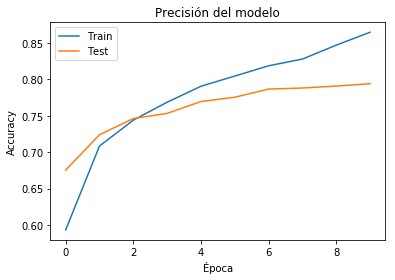

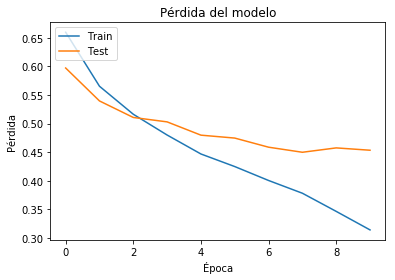

In [5]:
# Figura 1 - Valores de precisión para los conjuntos de entrenamiento y validación.
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Precisión del modelo')
plt.ylabel('Accuracy')
plt.xlabel('Época')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Figura 2 - Valores de pérdida para los conjuntos de entrenamiento y validación.
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Pérdida del modelo')
plt.ylabel('Pérdida')
plt.xlabel('Época')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

### 5. Prueba del modelo

In [6]:
# Modificar la ruta de 'Datos de prueba/' a la ruta correspondiente
# en donde se ubiquen las imagenes de prueba
test_dataset = datagen.flow_from_directory('Datos de prueba/',
                                           target_size=(IMAGE_SIZE, IMAGE_SIZE),
                                           color_mode='grayscale',
                                           class_mode='categorical',
                                           shuffle=False)

test_dataset.reset()

Found 17 images belonging to 2 classes.


### 6. Visualización de resultados para la prueba

In [9]:
training_dataset.class_indices


{'Cat': 0, 'Dog': 1}

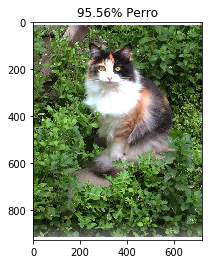

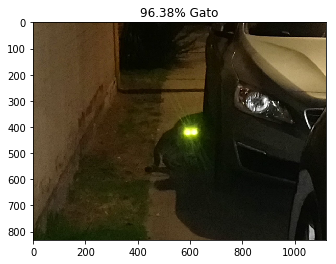

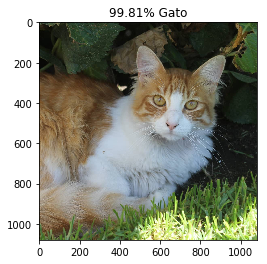

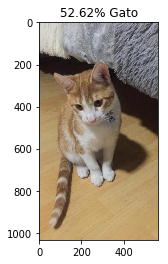

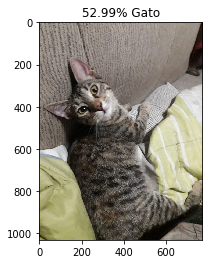

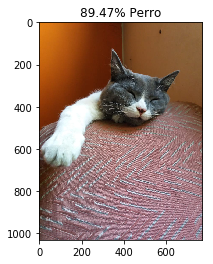

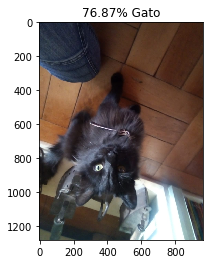

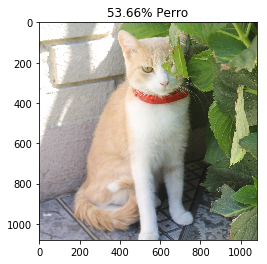

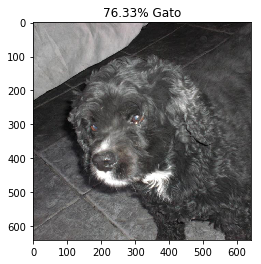

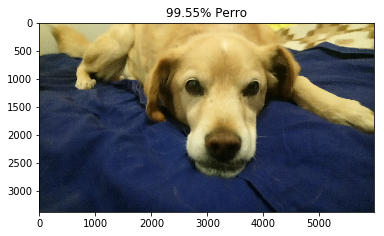

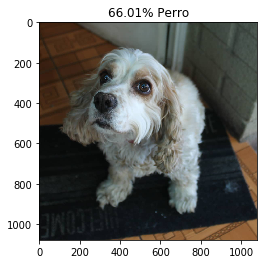

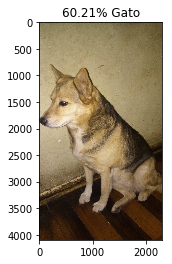

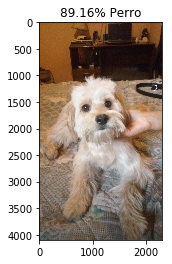

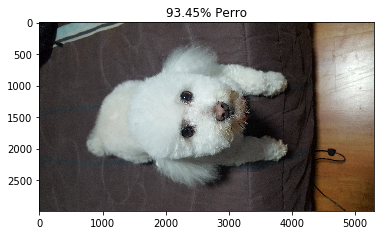

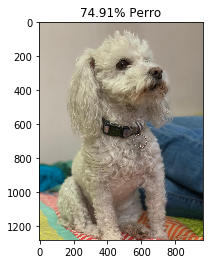

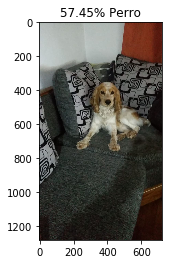

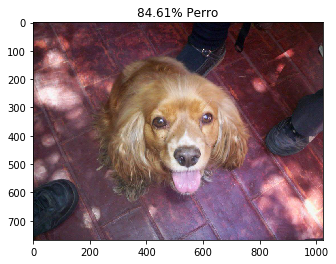

In [ ]:
probabilities = model.predict_generator(test_dataset, 17)    
for index, probability in enumerate(probabilities):
    image_path = "Datos de prueba/" +test_dataset.filenames[index]
    img = mpimg.imread(image_path)
    plt.imshow(img)
    if probability[0] > 0.5:
        plt.title("%.2f" % (probability[0]*100) + "% Gato")
    else:
        plt.title("%.2f" % ((1-probability[0])*100) + "% Perro")
    plt.show()

### 7. Matriz de confusión para el conjunto de prueba

In [8]:
y_pred = np.argmax(probabilities, axis=1)
print('Confusion Matrix')
print(confusion_matrix(test_dataset.classes, y_pred))
print('\nClassification Report')
target_names = ['Gato', 'Perro']
print(classification_report(test_dataset.classes, y_pred, target_names=target_names))

Confusion Matrix
[[6 2]
 [2 7]]

Classification Report
              precision    recall  f1-score   support

        Gato       0.75      0.75      0.75         8
       Perro       0.78      0.78      0.78         9

   micro avg       0.76      0.76      0.76        17
   macro avg       0.76      0.76      0.76        17
weighted avg       0.76      0.76      0.76        17



### 8. Conclusiones

<p style='text-align: justify;'>Respecto a los objetivos, el haber alcanzado un 80-85% aproximadamente de precision corresponde a una objetivo satisfactoriamente completado, de acuerdo a la configuración recomendada para la red convolucional, que por lo demás es muy básica si es que es comparada frente a otros métodos más avanzados para reconocimiento de imágenes. Estos resultados se ven reflejados en los datos de prueba que fueron analizados (mascotas de compañeros), respecto a la probabilidad de pertenecer a una determinada clase al momento de su clasifiación, en donde en algunos casos el porcentaje de pertenencia fue muy erroneo y en otros fue muy preciso, pero cabe destacar que existen muchos factores para evitar la correcta clasificación.</p>

<p style='text-align: justify;'>Para futuras experimentaciones, queda abierta la posibilidad de generar un modelo que procese las imagenes a mayor resolución o que emplee una escala de colores, a diferencia de la escala de grises empleada en esta experiencia. Por otro lado respecto a hipotesis que se podrian plantear para mejorar la precisión, es partir por realizar más iteraciones de entrenamiento, abarcar mas pixeles de la imagen respecto a la convolución, y tambien agregar más capas de neuronas, todo esto podria ser mucho mejor pero traeria consigo tiempos de procesamiento muy elevados ante el hardware que como equipo poseemos.</p>